In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Series
  - pandas의 기본 객체 중 하나
  - numpy의 ndarray를 기반으로 인덱싱을 기능을 추가하여 1차원 배열을 나타냄
  - index를 지정하지 않을 시, 기본적으로 ndarray와 같이 0-based 인덱스 생성, 지정할 경우 명시적으로 지정된 index를 사용
  - 같은 타입의 0개 이상의 데이터를 가질 수 있음

* data로만 생성하기
 - index는 기본적으로 0부터 자동적으로 생성

In [2]:
s1 = pd.Series([1, 2, 3])
s2 = pd.Series(['a', 'b', 'c'])

s1, s2

(0    1
 1    2
 2    3
 dtype: int64,
 0    a
 1    b
 2    c
 dtype: object)

* data, index함께 명시하기

In [9]:
# numpy와 다르게 pandas는 인덱스를 명시할 수 있음.
s3 = pd.Series([1, 2, 3], ['a', 'b', 'c'])
s3

a    1
b    2
c    3
dtype: int64

* data, index, data type 함께 명시하기

In [13]:
s4 = pd.Series(np.arange(5), np.arange(100, 105), dtype=np.int32)
s4

100    0
101    1
102    2
103    3
104    4
dtype: int32

#### 인덱스 활용하기

In [14]:
s4.index

Int64Index([100, 101, 102, 103, 104], dtype='int64')

In [15]:
s4.values

array([0, 1, 2, 3, 4], dtype=int32)

1. 인덱스를 통한 데이터 접근

In [19]:
s4[100], s4[104]

(0, 4)

2. 인덱스를 통한 데이터 업데이트

In [20]:
s4[104] = 70
s4

100     0
101     1
102     2
103     3
104    70
dtype: int32

In [21]:
# 기존에 값이 없었더라도 인덱스를 통해 업데이트 가능
s4[105] = 90
s4

100     0
101     1
102     2
103     3
104    70
105    90
dtype: int64

3. 인덱스 재사용하기

In [24]:
s5 = pd.Series(np.arange(6), s4.index) # 다른 series에서 index 가져오기 가능
s5

100    0
101    1
102    2
103    3
104    4
105    5
dtype: int64

## **Series size, shape, unique, count, value_counts 함수**
 - size : 개수 반환
 - shape : 튜플형태로 shape반환
 - unique: 유일한 값만 ndarray로 반환
 - count : NaN을 제외한 개수를 반환
 - mean: NaN을 제외한 평균 
 - value_counts: NaN을 제외하고 각 값들의 빈도를 반환 

In [26]:
s = pd.Series([1, 1, 2, 1, 2, 2, 2, 1, 1, 3, 3, 4, 5, 6, 7, np.NaN])
s

0     1.0
1     1.0
2     2.0
3     1.0
4     2.0
5     2.0
6     2.0
7     1.0
8     1.0
9     3.0
10    3.0
11    4.0
12    5.0
13    6.0
14    7.0
15    NaN
dtype: float64

In [ ]:
s.size

In [ ]:
s.shape

In [ ]:
s.unique()

In [ ]:
s.count()

In [ ]:
s.mean()   # a = np.array([2, 2, 2, 2, np.NaN])
           # a.mean()    =>  값으로 NaN이 나온다.
           # series의 mean()은 NaN을 무시한다.

In [36]:
s.value_counts()

16

(16,)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7., nan])

15

2.7333333333333334

1.0    5
2.0    4
3.0    2
7.0    1
6.0    1
4.0    1
5.0    1
dtype: int64

In [ ]:
# index를 활용해 멀티플한 값에 접근

s[[5, 7, 8]]  # list로 indexing한다.

In [38]:
s[[5, 7, 8]].value_counts()

5    2.0
7    1.0
8    1.0
dtype: float64

1.0    2
2.0    1
dtype: int64

#### **head, tail 함수**
 - head : 상위 n개 출력 기본 5개
 - tail : 하위 n개 출력 기본 5개

In [ ]:
s.head()

In [42]:
s.tail()

0    1.0
1    1.0
2    2.0
3    1.0
4    2.0
dtype: float64

11    4.0
12    5.0
13    6.0
14    7.0
15    NaN
dtype: float64

## Series 연산

#### Index를 기준으로 연산

In [43]:
s1 = pd.Series([1, 2, 3, 4], ['a', 'b', 'c', 'd'])
s2 = pd.Series([6, 3, 2, 1], ['d', 'c', 'b', 'a'])

s1, s2

(a    1
 b    2
 c    3
 d    4
 dtype: int64,
 d    6
 c    3
 b    2
 a    1
 dtype: int64)

In [44]:
s1 + s2
# 같은 index끼리 연산이 이뤄진다.

a     2
b     4
c     6
d    10
dtype: int64

#### **산술연산**
 - Series의 경우에도 스칼라와의 연산은 각 원소별로 스칼라와의 연산이 적용
 - Series와의 연산은 각 인덱스에 맞는 값끼리 연산이 적용
   - 이때, 인덱스의 pair가 맞지 않으면, 결과는 NaN 

In [47]:
# broadcasting
s1 ** 2

a     1
b     4
c     9
d    16
dtype: int64

In [46]:
s1 ** s2

a       1
b       4
c      27
d    4096
dtype: int64

#### **index pair가 맞지 않는 경우**
 - 해당 index에 대해선 NaN 값 생성

In [48]:
s1['k'] = 7
s2['e'] = 9

s1, s2

(a    1
 b    2
 c    3
 d    4
 k    7
 dtype: int64,
 d    6
 c    3
 b    2
 a    1
 e    9
 dtype: int64)

In [49]:
s1 + s2

# index pair가 맞지 않으면 NaN 값 생성

a     2.0
b     4.0
c     6.0
d    10.0
e     NaN
k     NaN
dtype: float64

 #### **Boolean selection**
  - boolean Series가 []와 함께 사용되면 True 값에 해당하는 값만 새로 반환되는 Series객체에 포함됨
  - 다중조건의 경우, &(and), |(or)를 사용하여 연결 가능

In [3]:
s1 = pd.Series(np.arange(10), np.arange(10)+1)
s1

1     0
2     1
3     2
4     3
5     4
6     5
7     6
8     7
9     8
10    9
dtype: int64

In [61]:
s1[s1 > 5]

7     6
8     7
9     8
10    9
dtype: int64

In [62]:
s1[s1.index % 2 == 0]

2     1
4     3
6     5
8     7
10    9
dtype: int64

## Series 슬라이싱

#### **Series 값 변경**
  - 추가 및 업데이트: 인덱스를 이용
  - 삭제: drop함수 이용


In [4]:
s = pd.Series(np.arange(100, 105), ['a', 'b', 'c', 'd', 'e'])
s

a    100
b    101
c    102
d    103
e    104
dtype: int64

In [ ]:
s['a'] = 200
s

In [59]:
s['k'] = 300
s

a    200
b    101
c    102
d    103
e    104
dtype: int64

a    200
b    101
c    102
d    103
e    104
k    300
dtype: int64

In [67]:
s.drop('k')

print(s)

# drop 함수는 s 자체에는 변화를 주지 않는다.
# drop의 parameter 중 inplace=True로 하면 원본에 변화를 준다.

a    200
b    101
c    102
d    103
e    104
dtype: int64

a    200
b    101
c    102
d    103
e    104
k    300
dtype: int64


#### **Slicing**
 - 리스트, ndarray와 동일하게 적용

In [68]:
s2 = pd.Series(np.arange(100, 105), ['a', 'c', 'b', 'd', 'e'])
s2

a    100
c    101
b    102
d    103
e    104
dtype: int64

In [69]:
s2[1:3]

c    101
b    102
dtype: int64

In [70]:
s2['c':'d']
# 문자열로 슬라이싱하면 end value까지 포함 시킨다.

c    101
b    102
d    103
dtype: int64

## DataFrame
  - Series가 1차원이라면 DataFrame은 2차원으로 확대된 버젼
  - Excel spreadsheet이라고 생각하면 이해하기 쉬움
  - 2차원이기 때문에 인덱스가 row, column로 구성됨
   - row는 각 개별 데이터를, column은 개별 속성을 의미
  - Data Analysis, Machine Learning에서 data 변형을 위해 가장 많이 사용

In [6]:
# data 출처: https://www.kaggle.com/hesh97/titanicdataset-traincsv/data
train_data = pd.read_csv('/Users/jihun/Desktop/Fastcampus/Part 01~04) Python/04. 데이터 분석을 위한 Python (Pandas)/data/train.csv')

#### head, tail 함수
 - 데이터 전체가 아닌, 일부(처음부터, 혹은 마지막부터)를 간단히 보기 위한 함수

In [7]:
train_data.head(n=3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [76]:
train_data.tail(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


#### dataframe 데이터 파악하기
 - shape 속성 (row, column)
 - describe 함수 - 숫자형 데이터의 통계치 계산
 - info 함수 - 데이터 타입, 각 아이템의 개수 등 출력

In [77]:
train_data.shape

(891, 12)

In [79]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [82]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 인덱스(index)
 - index 속성
 - 각 아이템을 특정할 수 있는 고유의 값을 저장
 - 복잡한 데이터의 경우, 멀티 인덱스로 표현 가능

In [10]:
train_data.index

RangeIndex(start=0, stop=891, step=1)

#### 컬럼(column)
 - columns 속성
 - 각각의 특성(feature)을 나타냄
 - 복잡한 데이터의 경우, 멀티 컬럼으로 표현 가능

In [89]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## DataFrame 생성하기
 - 일반적으로 분석을 위한 데이터는 다른 데이터 소스(database, 외부 파일)을 통해 dataframe을 생성
 - 여기서는 실습을 통해, dummy 데이터를 생성하는 방법을 다룰 예정

#### dictionary로 부터 생성하기
 - dict의 key -> column

In [92]:
data = {'a': 100, 'b': 200, 'c': 300}
pd.DataFrame(data, index = [0, 1, 2])

,a,b,c
0,100,200,300
1,100,200,300
2,100,200,300


In [93]:
data = {'a' : [100, 200, 300], 'b': [1, 2, 3], 'c': [4, 5, 6]}
pd.DataFrame(data, index=[100, 200, 300])

,a,b,c
100,100,1,4
200,200,2,5
300,300,3,6


#### Series로 부터 생성하기
 - 각 Series의 인덱스 -> column

In [94]:
a = pd.Series([100, 200, 300], ['a', 'b', 'c'])
b = pd.Series([101, 202, 303], ['a', 'b', 'c'])
c = pd.Series([110, 220, 330], ['a', 'b', 'c'])

pd.DataFrame([a, b, c])

,a,b,c
0,100,200,300
1,101,202,303
2,110,220,330


In [97]:
a = pd.Series(np.random.randint(100,200,50), np.arange(0,50))
b = pd.Series(np.random.randint(100,200,50), np.arange(0,50))
c = pd.Series(np.random.randint(100,200,50), np.arange(0,50))

pd.DataFrame([a, b, c])

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,151,105,147,119,165,145,140,156,110,154,...,115,102,109,106,122,143,157,199,118,118
1,127,127,140,136,170,142,175,160,147,155,...,185,184,181,160,137,129,168,103,167,164
2,145,190,122,105,154,169,159,180,149,199,...,144,149,184,126,141,180,114,108,151,153


## csv 데이터로 부터 Dataframe 생성
 - 데이터 분석을 위해, dataframe을 생성하는 가장 일반적인 방법
 - 데이터 소스로부터 추출된 csv(comma separated values) 파일로부터 생성
 - pandas.read_csv 함수 사용

In [98]:
# data 출처: https://www.kaggle.com/hesh97/titanicdataset-traincsv/data
train_data = pd.read_csv('/Users/jihun/Desktop/Fastcampus/Part 01~04) Python/04. 데이터 분석을 위한 Python (Pandas)/data/train.csv')

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### read_csv 함수 파라미터
 - sep - 각 데이터 값을 구별하기 위한 구분자(separator) 설정 
 - header - header를 무시할 경우, None 설정
 - index_col - index로 사용할 column 설정
 - usecols - 실제로 dataframe에 로딩할 columns만 설정

In [107]:
path = '/Users/jihun/Desktop/Fastcampus/Part 01~04) Python/04. 데이터 분석을 위한 Python (Pandas)/data/train.csv'
train_data = pd.read_csv(path, index_col='PassengerId', usecols=['PassengerId', 'Survived', 'Pclass', 'Name'])

train_data.head()

,Survived,Pclass,Name
PassengerId,,,
1,0,3,"Braund, Mr. Owen Harris"
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,1,3,"Heikkinen, Miss. Laina"
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,0,3,"Allen, Mr. William Henry"


## DataFrame 데이터 처리


#### column 선택하기
  - 기본적으로 [ ]는 column을 추출 
  - 컬럼 인덱스일 경우 인덱스의 리스트 사용 가능
    - 리스트를 전달할 경우 결과는 Dataframe
    - 하나의 컬럼명을 전달할 경우 결과는 Series

In [109]:
# data 출처: https://www.kaggle.com/hesh97/titanicdataset-traincsv/data
train_data = pd.read_csv('/Users/jihun/Desktop/Fastcampus/Part 01~04) Python/04. 데이터 분석을 위한 Python (Pandas)/data/train.csv')

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 하나의 컬럼 선택하기

In [114]:
train_data['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

#### 복수의 컬럼 선택하기

In [117]:
train_data[['Survived', 'Age', 'Name']]

,Survived,Age,Name
0,0,22.0,"Braund, Mr. Owen Harris"
1,1,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,1,26.0,"Heikkinen, Miss. Laina"
3,1,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,0,35.0,"Allen, Mr. William Henry"
...,...,...,...
886,0,27.0,"Montvila, Rev. Juozas"
887,1,19.0,"Graham, Miss. Margaret Edith"
888,0,NaN,"Johnston, Miss. Catherine Helen ""Carrie"""
889,1,26.0,"Behr, Mr. Karl Howell"


#### dataframe slicing
  - dataframe의 경우 기본적으로 [] 연산자가 **column 선택**에 사용
  - 하지만, slicing은 row 레벨로 지원

In [121]:
train_data[:10] # slicing은 row-level
                # 기본적으로 df 대괄호는 column-level

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### row 선택하기
  - Seires의 경우 []로 row 선택이 가능하나, **DataFrame의 경우는 기본적으로 column을 선택하도록 설계**
  - **.loc, .iloc함수**로 row 선택 가능
    - loc - 인덱스 자체를 사용
    - iloc - 0 based index로 사용
    - 이 두 함수는 ,를 사용하여 column 선택도 가능

In [12]:
train_data.index = np.

Int64Index([100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
            ...
            981, 982, 983, 984, 985, 986, 987, 988, 989, 990],
           dtype='int64', length=891)

In [11]:
train_data.index = np.arange(100, 991)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
100,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
101,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
102,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
103,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
104,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [130]:
train_data.loc[986]

# '986' index의 데이터를 Series로 가져온다.

PassengerId                      887
Survived                           0
Pclass                             2
Name           Montvila, Rev. Juozas
Sex                             male
Age                             27.0
SibSp                              0
Parch                              0
Ticket                        211536
Fare                            13.0
Cabin                            NaN
Embarked                           S
Name: 986, dtype: object

In [128]:
train_data.iloc[0:3]

# 0-based index를 사용해서 데이터를 가져온다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
100,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
101,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
102,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### loc & iloc

- loc과 iloc을 사용하면 row와 column을 모두 선택할 수 있다.

In [133]:
train_data.loc[[986, 100, 110, 990], ['Name', 'Survived', 'Sex', 'Age']]

# row와 column을 모두 선택할 수 있다.

,Name,Survived,Sex,Age
986,"Montvila, Rev. Juozas",0,male,27.0
100,"Braund, Mr. Owen Harris",0,male,22.0
110,"Sandstrom, Miss. Marguerite Rut",1,female,4.0
990,"Dooley, Mr. Patrick",0,male,32.0


#### **boolean selection으로 row 선택하기**
 - numpy에서와 동일한 방식으로 해당 조건에 맞는 row만 선택

## 30대이면서 1등석에 탄 사람 선택하기 

In [134]:
# data 출처: https://www.kaggle.com/hesh97/titanicdataset-traincsv/data
train_data = pd.read_csv('/Users/jihun/Desktop/Fastcampus/Part 01~04) Python/04. 데이터 분석을 위한 Python (Pandas)/data/train.csv')

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [143]:
class_ = train_data['Pclass'] == 1
age_ = (train_data['Age'] >= 30 & (train_data['Age'] < 40))

train_data[class_ & age_]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [144]:
# 30대이면서 1등석에 탄 사람 중 생존한 사람 숫자

train_data[class_ & age_]['Survived'].sum()

122

#### 새 column 추가하기
 - [] 사용하여 추가하기
 - insert 함수 사용하여 원하는 위치에 추가하기

In [146]:
# broadcasting
train_data['Age'] * 2

train_data['Age_double'] = train_data['Age'] * 2
train_data.head()

0      44.0
1      76.0
2      52.0
3      70.0
4      70.0
       ... 
886    54.0
887    38.0
888     NaN
889    52.0
890    64.0
Name: Age, Length: 891, dtype: float64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_double
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,44.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,76.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,52.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,70.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,70.0


In [147]:
train_data.insert(3, 'Fare10', train_data['Fare'] / 10)
        # column index 3번에 fare10을 추가하는데, 값은 'Fare'/10
train_data.head()

,PassengerId,Survived,Pclass,Fare10,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_double
0,1,0,3,0.72500,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,44.0
1,2,1,1,7.12833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,76.0
2,3,1,3,0.79250,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,52.0
3,4,1,1,5.31000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,70.0
4,5,0,3,0.80500,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,70.0


#### column 삭제하기
 - drop 함수 사용하여 삭제
   - 리스트를 사용하여 멀티플 삭제 가능 

In [151]:
train_data.drop('Age_double', axis=1)

# 이것도 원본 df를 수정하는 게 아님! 복사본에서 drop하는 거임!

,PassengerId,Survived,Pclass,Fare10,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0.72500,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,7.12833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,0.79250,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,5.31000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,0.80500,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1.30000,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,3.00000,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,2.34500,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,3.00000,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [150]:
train_data.head()

,PassengerId,Survived,Pclass,Fare10,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_double
0,1,0,3,0.72500,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,44.0
1,2,1,1,7.12833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,76.0
2,3,1,3,0.79250,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,52.0
3,4,1,1,5.31000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,70.0
4,5,0,3,0.80500,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,70.0


## 변수(column) 사이의 상관계수(correlation) 
 - corr함수를 통해 상관계수 연산 (-1, 1 사이의 결과)
   - 연속성(숫자형)데이터에 대해서만 연산
   - 인과관계를 의미하진 않음

In [152]:
# data 출처: https://www.kaggle.com/hesh97/titanicdataset-traincsv/data
train_data = pd.read_csv('/Users/jihun/Desktop/Fastcampus/Part 01~04) Python/04. 데이터 분석을 위한 Python (Pandas)/data/train.csv')

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [153]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


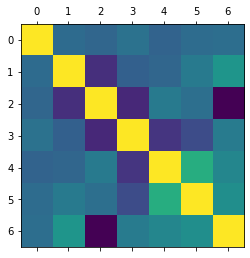

In [156]:
plt.matshow(train_data.corr())

#### NaN 값 확인
 - info함수를 통하여 개수 확인
 - isna함수를 통해 boolean 타입으로 확인

In [157]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [161]:
train_data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


#### NaN 처리 방법
 - 데이터에서 삭제
   - dropna 함수 
 - 다른 값으로 치환
   - fillna 함수

* NaN 데이터 삭제하기

In [163]:
# 어떤 row에 한 개라도 NaN이 있다면 해당 row를 drop한다.
train_data.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [167]:
# Age가 NaN일 때만 drop한다.
train_data.dropna(subset=['Age'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


* NaN 값 대체하기
 - 평균으로 대체하기
 - 생존자/사망자 별 평균으로 대체하기

In [169]:
# Age의 NaN을 모두 Age의 평균으로 대체한다.
train_data['Age'].fillna(train_data['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [197]:
# 생존자 나이 평균
mean1 = train_data[train_data['Survived'] == 1]['Age'].mean()

# 사망자 나이 평균
mean2 = train_data[train_data['Survived'] == 0]['Age'].mean()

print(mean1, mean2)

# 생존자 NaN 대체
train_data[train_data['Survived'] == 1]['Age'].fillna(mean1)

# 사망자 NaN 대체
train_data[train_data['Survived'] == 0]['Age'].fillna(mean2)

28.3436896551724 30.62617924528295


1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

0      22.000000
4      35.000000
5      30.626179
6      54.000000
7       2.000000
         ...    
884    25.000000
885    39.000000
886    27.000000
888    30.626179
890    32.000000
Name: Age, Length: 549, dtype: float64

In [203]:
#실제로 원본 데이터를 수정하려면...
train_data.loc[train_data['Survived'] == 1, 'Age'] = train_data[train_data['Survived'] == 1]['Age'].fillna(mean1)
train_data.loc[train_data['Survived'] == 0, 'Age'] = train_data[train_data['Survived'] == 0]['Age'].fillna(mean2)

In [205]:
# 수정사항 확인
train_data[train_data['Age'] == 28.3436896551724]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
